In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Mental_Health_Dataset.csv")



In [2]:
# Display the first few rows of the dataframe
print(df.head())

             Timestamp  Gender        Country Occupation self_employed  \
0  2014-08-27 11:29:31  Female  United States  Corporate           NaN   
1  2014-08-27 11:31:50  Female  United States  Corporate           NaN   
2  2014-08-27 11:32:39  Female  United States  Corporate           NaN   
3  2014-08-27 11:37:59  Female  United States  Corporate            No   
4  2014-08-27 11:43:36  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium           

In [3]:
# Check for missing values
print(df.isnull().sum())

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


In [65]:
from sklearn.impute import SimpleImputer

# Impute missing values in the 'self_employed' column with the most frequent value
most_frequent_value = df['self_employed'].mode()[0]
df['self_employed'].fillna(most_frequent_value, inplace=True)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in ['Gender', 'Country', 'Occupation', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


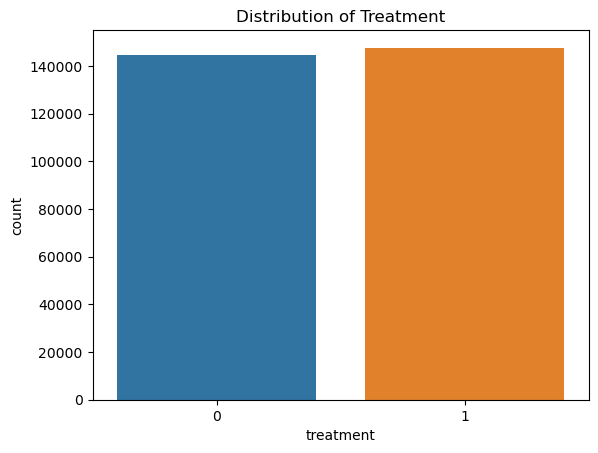

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of 'treatment' variable
sns.countplot(x='treatment', data=df)
plt.title('Distribution of Treatment')
plt.show()


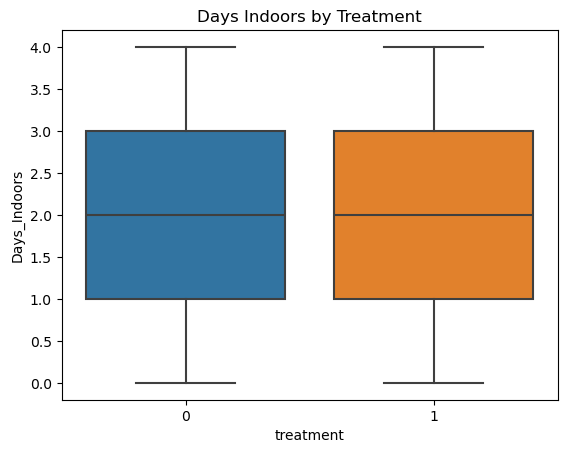

In [16]:
sns.boxplot(x='treatment', y='Days_Indoors', data=df)
plt.title('Days Indoors by Treatment')
plt.show()


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


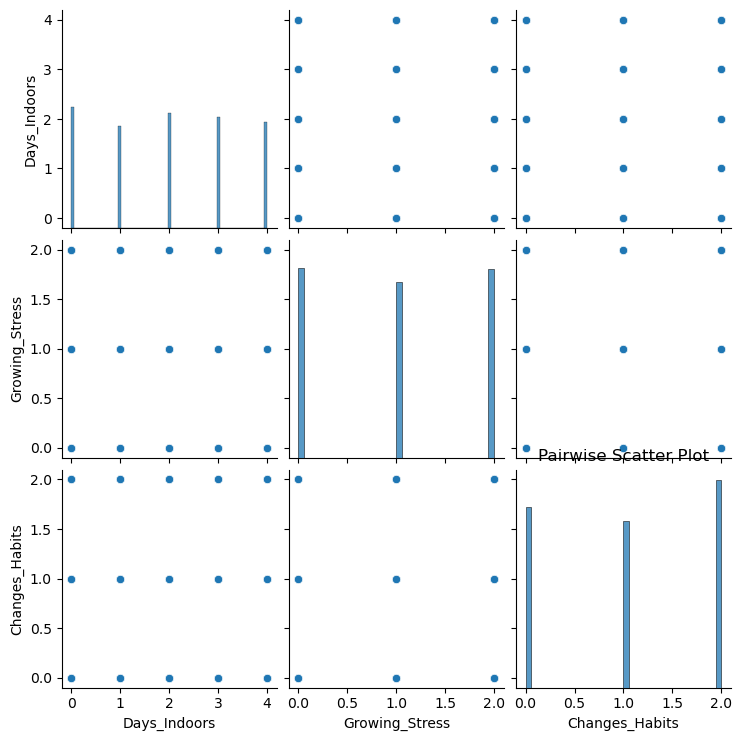

In [17]:
sns.pairplot(df[['Days_Indoors', 'Growing_Stress', 'Changes_Habits']])
plt.title('Pairwise Scatter Plot')
plt.show()


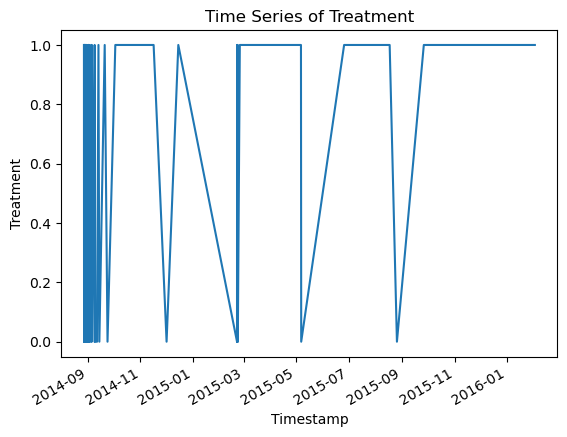

In [20]:
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot time series data
df.set_index('Timestamp')['treatment'].plot()
plt.title('Time Series of Treatment')
plt.xlabel('Timestamp')
plt.ylabel('Treatment')
plt.show()



In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest 
# Drop non-numeric columns and columns with missing values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols].dropna()


In [27]:
# Initialize Isolation Forest model
outlier_detector = IsolationForest(contamination=0.05)

In [28]:
# Fit the model to the numeric data
outlier_detector.fit(df_numeric)

D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

In [29]:
# Predict outliers
outlier_labels = outlier_detector.predict(df_numeric)
outliers = df_numeric[outlier_labels == -1]


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


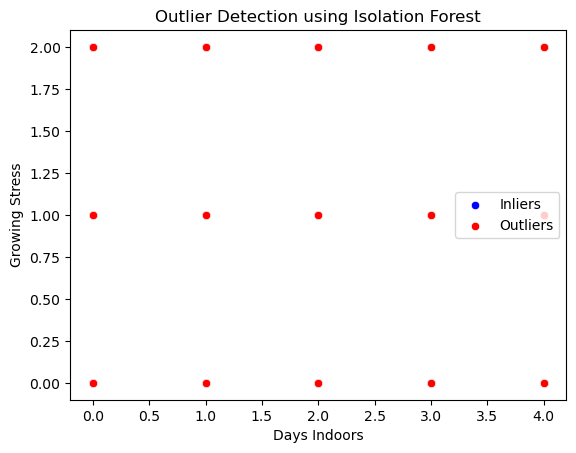

In [31]:
# Visualize outliers using scatter plot
sns.scatterplot(data=df_numeric, x='Days_Indoors', y='Growing_Stress', color='blue', label='Inliers')
sns.scatterplot(data=outliers, x='Days_Indoors', y='Growing_Stress', color='red', label='Outliers')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Days Indoors')
plt.ylabel('Growing Stress')
plt.legend()
plt.show()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Drop non-numeric columns and columns with missing values
df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna()

# Convert categorical variables to numerical representations using label encoding
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df_numeric[column] = label_encoder.fit_transform(df[column])

# Split data into features (X) and target variable (y)
X = df_numeric.drop(columns=['treatment'])  # Features
y = df_numeric['treatment']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)







In [36]:
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Predict on the test set
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6965437039317292



Segmentation analysis using k means

In [85]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Mental_Health_Dataset.csv")

# Drop irrelevant columns (Gender, Country, Occupation, Days_Indoors)
df.drop(['Gender', 'Country', 'Occupation', 'Days_Indoors'], axis=1, inplace=True)

# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['self_employed', 'family_history', 'treatment', 'Growing_Stress', 
                       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 
                       'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 
                       'mental_health_interview', 'care_options']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


# Handling missing values in numeric columns (if any)
df.dropna(inplace=True)

# Select features for segmentation analysis
selected_features = ['Growing_Stress']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)




D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rawat\AppData\Local\Temp\ipykernel_18988\2958833337.py:36: ConvergenceWarning: Number of distinct c

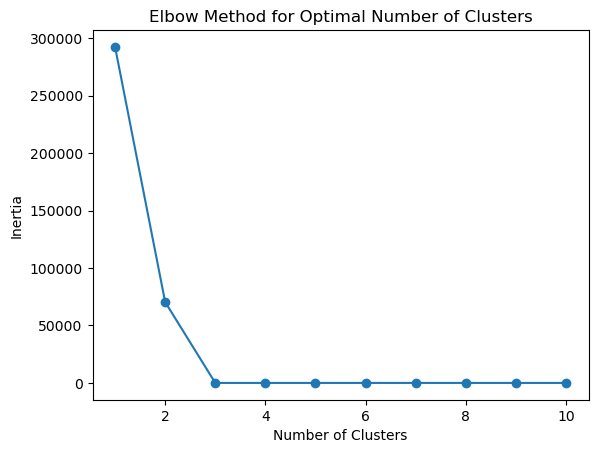

In [86]:
# Plot the Elbow Method to visualize the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()



In [87]:
# Based on the Elbow Method, choose the optimal number of clusters and perform K-means clustering
k = 3  # Choose the optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_



D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


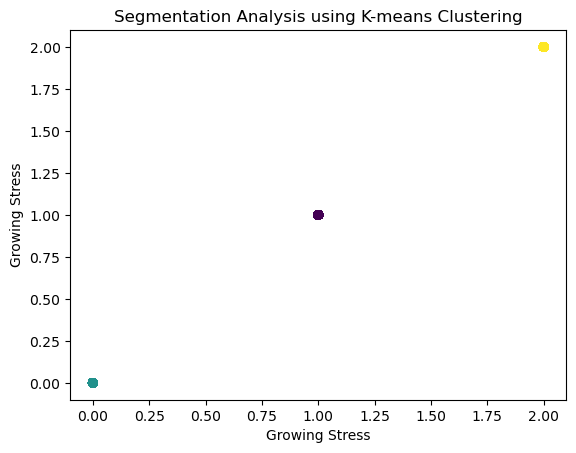

In [88]:
# Visualize the clusters
plt.scatter(df['Growing_Stress'], df['Growing_Stress'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Growing Stress')
plt.ylabel('Growing Stress')  # Add y-label for clarity
plt.title('Segmentation Analysis using K-means Clustering')
plt.show()


In [89]:


# Analyze cluster characteristics
cluster_means = df.groupby('Cluster')[selected_features].mean()
print(cluster_means)


         Growing_Stress
Cluster                
0                   1.0
1                   0.0
2                   2.0


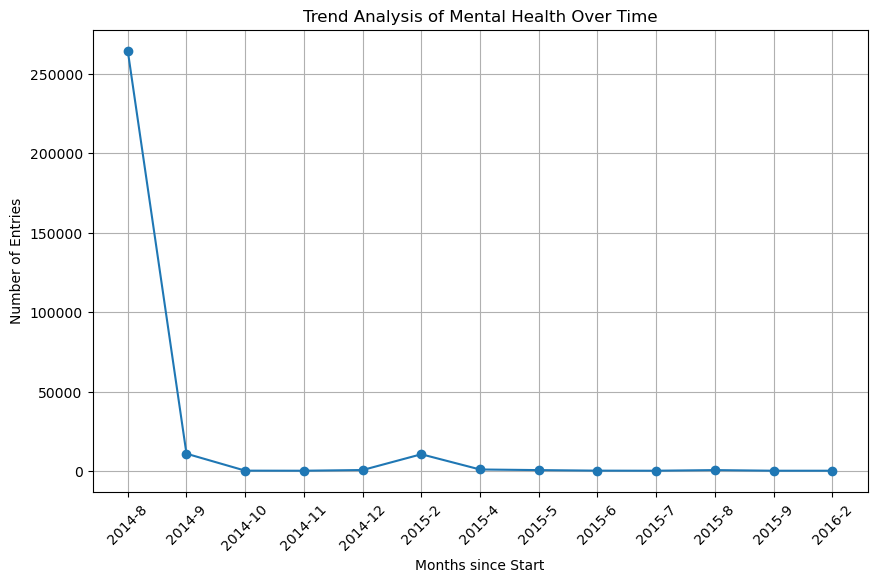

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Mental_Health_Dataset.csv")

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract year and month from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month

# Group the data by year and month and count the number of entries
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Plot trend analysis
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts['Count'], marker='o', linestyle='-')
plt.title('Trend Analysis of Mental Health Over Time')
plt.xlabel('Months since Start')
plt.ylabel('Number of Entries')
plt.xticks(ticks=range(len(monthly_counts)), labels=[f"{y}-{m}" for y, m in zip(monthly_counts['Year'], monthly_counts['Month'])], rotation=45)
plt.grid(True)
plt.show()
